In [270]:
# packages
import pandas as pd
import numpy as  np

In [271]:
# import data, read file
client_data = pd.read_csv('dataset_mood_smartphone.csv')

In [272]:
client_data.id.nunique()
client_data.variable.unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [273]:
client_data[client_data['variable']== 'mood'].value.nunique()
client_data[client_data['variable']== 'activity'].value.unique()

array([0.07142857, 0.09166667, 0.00833333, ..., 0.17094017, 0.62096774,
       0.73109244])

In [274]:
client_data.head(5)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


# preprocessing

In [275]:
# task 2
client_data_new=pd.DataFrame(columns=['id', 'time', 'var',"value"])

temp_list=[]
prev_day='02-26'

for index, row in client_data.iterrows():
    
    date=row['time'].split(' ')[0]
    date=date.split('-')[1]+'-'+date.split('-')[2]
    
    if date != prev_day:
        client_data_new.loc[index]=[client_data.loc[index-1]['id'], prev_day , client_data.loc[index-1]['variable'], np.mean(temp_list)]
        temp_list=[row['value']]
    else:
        temp_list.append(row['value'])
    prev_day=date

In [276]:
# test = client_data_new['time'][0]
# test = test.split(' ')[0]
# test = test.split('-')[1]+'-'+test.split('-')[2]
# test

In [277]:
client_data_new.head(5)

,id,time,var,value
4,AS14.01,02-26,mood,6.250000
7,AS14.01,02-27,mood,6.333333
12,AS14.01,03-21,mood,6.200000
17,AS14.01,03-22,mood,6.400000
22,AS14.01,03-23,mood,6.800000


In [279]:
# task 3, t=4 per row

temp = pd.DataFrame(client_data_new.values)
df = pd.concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)
df.columns = ['id-1','time1','var1','val1','id-2','time2','var2','val2','id-3','time3','var3','val3','id-4','time4','var4','val4']

# client_data is the main data set, df is for filtering out unmatching rows
client_data = df.loc[3:]
df = df.loc[3:]
# df_test = df

In [281]:
# filtering out variable and id that do not match per row
df['id_check'] = 0
df['var_check'] = 0

for i, row in df.iterrows():
    if (row['id-1']== row['id-2']) & (row['id-1']==row['id-3'])& (row['id-1']==row['id-4']):
        df.loc[i,'id_check'] = 1
    else:
        df.loc[i,'id_check'] = 0
    
    if (row['var1']== row['var2']) & (row['var1']==row['var3'])& (row['var1']==row['var4']):
        df.loc[i,'var_check'] = 1
    else:
        df.loc[i,'var_check'] = 0


In [282]:
# df['id_check'] = 0
# df['var_check'] = 0
# for index in range(len(df)):
#     if ((df.iloc[index]['id-1'] == df.iloc[index]['id-2']) & (df.iloc[index]['id-1'] == df.iloc[index]['id-3'])
#         &(df.iloc[index]['id-1'] == df.iloc[index]['id-4'])):
#         df.iloc[index]['id_check'] = 1
#     else:
#         df.iloc[index]['id_check'] = 0

        
# for index in range(len(df)):
#     if ((df.iloc[index]['var1'] == df.iloc[index]['var2']) & (df.iloc[index]['var1'] == df.iloc[index]['var3'])
#         &(df.iloc[index]['var1'] == df.iloc[index]['var4'])):
#         df.iloc[index]['var_check'] = 1
#     else:
#         df.iloc[index]['var_check'] = 0


# for index in range(len(df)):
#     if ((df.iloc[index]['var1'] == df.iloc[index]['var2']) & (df.iloc[index]['var1'] == df.iloc[index]['var3'])
#         &(df.iloc[index]['var1'] == df.iloc[index]['var4'])):
#         df['var_check'] = 1
#     else:
#         df['var_check'] = 0

In [283]:
# cleaning: removing rows that dont match id/var

#removing rows with different ID and variable
for i, row in df.iterrows():
    if row['id_check']==0 or row['var_check']==0:
        client_data=client_data.drop(i)
    
client_data=client_data.drop(['var2','var3','var4','id-2','id-3','id-4'], axis=1) 

print(df.shape)
print(client_data.shape)

(15515, 18)
(14188, 10)


In [298]:
columns_titles = ['id-1','var1','time1','val1','time2','val2','time3','val3','time4','val4']
client_data=client_data.reindex(columns=columns_titles)
client_data = client_data.reset_index()
client_data = client_data.drop(columns=['index'])

# make times into datetime, to calculate with it
client_data['time1'] = pd.to_datetime(client_data['time1'],format="%m-%d")
client_data['time2'] = pd.to_datetime(client_data['time2'],format="%m-%d")
client_data['time3'] = pd.to_datetime(client_data['time3'],format="%m-%d")
client_data['time4'] = pd.to_datetime(client_data['time4'],format="%m-%d")

In [367]:
client_data.head(3)

,id-1,var1,time1,val1,time2,val2,time3,val3,time4,val4,avg,slope
0,AS14.01,mood,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.80,1900-03-24,6.00,6.466667,0.300
1,AS14.01,mood,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6.00,1900-03-25,6.75,6.400000,-0.200
2,AS14.01,mood,1900-03-23,6.8,1900-03-24,6.0,1900-03-25,6.75,1900-03-26,6.60,6.516667,-0.025


In [316]:
# delta time step is 1 day --> timedelta(-1 days)

In [321]:
#check and remove rows where the days are not consecutives 

data_iter=client_data
for i, row in data_iter.iterrows():
    delta1=data_iter["time1"].iloc[i] - data_iter["time2"].iloc[i]
    delta2=data_iter["time2"].iloc[i] - data_iter["time3"].iloc[i]
    delta3=data_iter["time3"].iloc[i] - data_iter["time4"].iloc[i]
    
    delta1=delta1.days
    delta2=delta2.days
    delta3=delta3.days
    
    if delta1 != -1 or delta2 != -1 or delta3 != -1:
        client_data = client_data.drop(i)


IndexError: single positional indexer is out-of-bounds

In [325]:
client_data=client_data.reset_index()
client_data = client_data.drop(columns=["index"])
client_data.head()

,id-1,var1,time1,val1,time2,val2,time3,val3,time4,val4
0,AS14.01,mood,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6
1,AS14.01,mood,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6,1900-03-25,6.75
2,AS14.01,mood,1900-03-23,6.8,1900-03-24,6,1900-03-25,6.75,1900-03-26,6.6
3,AS14.01,mood,1900-03-24,6,1900-03-25,6.75,1900-03-26,6.6,1900-03-27,7
4,AS14.01,mood,1900-03-25,6.75,1900-03-26,6.6,1900-03-27,7,1900-03-28,6.4


In [340]:
# client_data["val1"] = client_data["val1"].apply(pd.to_numeric, errors='coerce')
# client_data["val2"] = client_data["val2"].apply(pd.to_numeric, errors='coerce')
# client_data["val3"] = client_data["val3"].apply(pd.to_numeric, errors='coerce')
# client_data["val4"] = client_data["val4"].apply(pd.to_numeric, errors='coerce')

In [341]:
# these actions are part of the preliminary process
#add column with the average 
client_data['avg'] = client_data[['val1','val2', 'val3']].mean(axis=1)

# add slope column
slopes = []
for i, row in client_data.iterrows():
    a,b = np.polyfit([1,2,3],[row['val1'],row['val2'],row['val3']],1)
    slopes.append(a)
client_data['slope']=slopes

client_data.head(5)

,id-1,var1,time1,val1,time2,val2,time3,val3,time4,val4,avg,slope
0,AS14.01,mood,1900-03-21,6.20,1900-03-22,6.40,1900-03-23,6.80,1900-03-24,6.00,6.466667,0.300
1,AS14.01,mood,1900-03-22,6.40,1900-03-23,6.80,1900-03-24,6.00,1900-03-25,6.75,6.400000,-0.200
2,AS14.01,mood,1900-03-23,6.80,1900-03-24,6.00,1900-03-25,6.75,1900-03-26,6.60,6.516667,-0.025
3,AS14.01,mood,1900-03-24,6.00,1900-03-25,6.75,1900-03-26,6.60,1900-03-27,7.00,6.450000,0.300
4,AS14.01,mood,1900-03-25,6.75,1900-03-26,6.60,1900-03-27,7.00,1900-03-28,6.40,6.783333,0.125


# final output preprocessed data 
client data or final_df

In [ ]:
# settin the DF target value form
final_df = client_data

final_df=final_df.rename(index=str, columns={"val4": "mood_target"})
final_df=final_df.drop(['val1', 'val2',"val3"], axis=1)

In [ ]:
final_df.head(5)

final_df["mood_target"] = final_df["mood_target"].apply(pd.to_numeric, errors='coerce')
final_df["avg"] = final_df["avg"].apply(pd.to_numeric, errors='coerce')
final_df["slope"] = final_df["slope"].apply(pd.to_numeric, errors='coerce')

In [366]:
# output to csv
client_data.to_csv("dataset-Preprocessed1.csv")
final_df.to_csv("dataset-Preprocessed2.csv")

# preliminary analysis, not correct! tried some stuff

In [345]:
final_df.head(5)

,id-1,var1,time1,time2,time3,time4,mood_target,avg,slope
0,AS14.01,mood,1900-03-21,1900-03-22,1900-03-23,1900-03-24,6.00,6.466667,0.300
1,AS14.01,mood,1900-03-22,1900-03-23,1900-03-24,1900-03-25,6.75,6.400000,-0.200
2,AS14.01,mood,1900-03-23,1900-03-24,1900-03-25,1900-03-26,6.60,6.516667,-0.025
3,AS14.01,mood,1900-03-24,1900-03-25,1900-03-26,1900-03-27,7.00,6.450000,0.300
4,AS14.01,mood,1900-03-25,1900-03-26,1900-03-27,1900-03-28,6.40,6.783333,0.125


In [356]:
# pivot table
pivot = pd.pivot_table(final_df, values=['avg','slope','mood_target'], index=['id-1', 'time4'], columns=['var1'])

# pivot tweeking
pivot_t=pivot


list_to_remove=[("mood_target","activity"),("mood_target","appCat.builtin"),("mood_target","appCat.communication"),("mood_target","appCat.entertainment"),
                ("mood_target","appCat.finance"),("mood_target","appCat.game"),("mood_target","appCat.office"),
                ("mood_target","appCat.other"),("mood_target","appCat.social"),("mood_target","appCat.travel"),
                ("mood_target","appCat.unknown"),("mood_target","appCat.utilities"),("mood_target","appCat.weather"),
                ("mood_target","call"),("mood_target","circumplex.arousal"),("mood_target","circumplex.valence"),
                ("mood_target","screen"),("mood_target","sms")]

pivot_t=pivot_t.drop(list_to_remove, axis =1)


In [358]:
# testingggg
#delete rows with only Nan
pivot_t =pivot_t.dropna(how='all')
#drop rows where there is no mood to predict
pivot_t = pivot_t.dropna(axis=0, subset=[('mood_target','mood')])
#check which variables have empty values
# test.isna().any()

In [363]:
pivot_t=pivot_t.fillna(0)

cols = list(pivot_t.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index(("mood_target","mood"))) #Remove b from list
pivot_t = pivot_t[cols+[("mood_target","mood")]] #Create new dataframe with columns in the order you want

# pivot_t.to_csv("Preprocessed-dataset.csv")

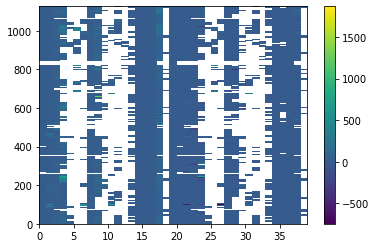

In [360]:
# heatmap
import matplotlib.pyplot as plt

plt.pcolor(test)
plt.colorbar()
plt.show()